# Data preprocessing and split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [2]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [3]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [4]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [5]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [6]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [7]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [8]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [9]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [10]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dense(16, activation= 'relu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 46456 

In [11]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [12]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-multiregression-model.keras')
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=10, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, validation_data=(val_scale, val_output) ,epochs=1000, callbacks=[callback])

Epoch 1/1000
20/20 [==============================] - 0s 8ms/step - loss: 9657.9980 - mae: 53.9327 - mse: 9657.9980 - val_loss: 2631.7876 - val_mae: 32.7696 - val_mse: 2631.7876
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 1001.7405 - mae: 18.6578 - mse: 1001.7405 - val_loss: 410.7688 - val_mae: 13.8893 - val_mse: 410.7688
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 306.5772 - mae: 11.0283 - mse: 306.5772 - val_loss: 182.3927 - val_mae: 8.2035 - val_mse: 182.3927
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 175.9911 - mae: 8.1509 - mse: 175.9911 - val_loss: 135.7748 - val_mae: 7.1469 - val_mse: 135.7748
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 134.8668 - mae: 7.2348 - mse: 134.8668 - val_loss: 119.7165 - val_mae: 6.9597 - val_mse: 119.7165
Epoch 6/1000
20/20 [==============================] - 0s 3ms/step - loss: 117.4797 - mae: 7.0008 - mse: 117.4797 - val_loss: 102.

In [13]:
model.save('/Users/ujong-yun/Documents/GitHub/knocking-classification-and-multi-regression/best-multiregression-model.keras')


In [14]:
hist = history.history
hist['epochs'] = history.epoch
epochs = hist['epochs']
loss = hist['loss']
val_loss = hist['val_loss']
mae = hist['mae']
val_mae = hist['val_mae']
mse = hist['mse']
val_mse = hist['mse']
def plot_history(history):

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(epochs, loss, label = 'Training_loss')
    axes[0].plot(epochs, val_loss, label = 'val_loss')
    axes[1].plot(epochs, mae, label = 'Training_mae')
    axes[1].plot(epochs, val_mae, label = 'val_mae')
    axes[2].plot(epochs, mse, label = 'Training_mse')
    axes[2].plot(epochs, val_mse, label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


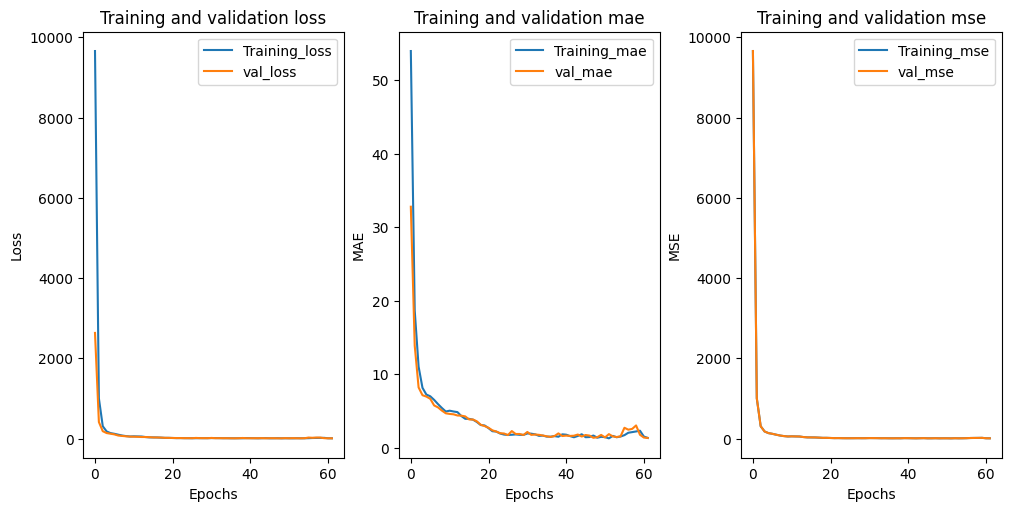

In [15]:
plot_history(history)

In [16]:
loss_mae_mse_df = pd.DataFrame(((loss[i], val_loss[i], mae[i], val_mae[i],  mse[i], val_mse[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'])
loss_mae_mse_df

,Loss,Val_Loss,MAE,Val_MAE,MSE,Val_MSE
0,9657.998047,2631.787598,53.932652,32.769585,9657.998047,9657.998047
1,1001.740479,410.768829,18.657835,13.889348,1001.740479,1001.740479
2,306.577209,182.392685,11.028275,8.203536,306.577209,306.577209
3,175.991089,135.774796,8.150881,7.146877,175.991089,175.991089
4,134.866776,119.716522,7.234834,6.959750,134.866776,134.866776
...,...,...,...,...,...,...
57,14.258136,24.092928,2.130149,2.569126,14.258136,14.258136
58,15.372766,23.877293,2.219703,3.034043,15.372766,15.372766
59,16.730883,8.453639,2.320862,1.769159,16.730883,16.730883
60,6.466622,5.323394,1.526518,1.389827,6.466622,6.466622


In [17]:
loss_mae_mse_df.to_csv('Loss_Mae_Mse_df.csv', index = True)

In [18]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 899us/step - loss: 4.9838 - mae: 1.3362 - mse: 4.9838


[4.983811855316162, 1.3362243175506592, 4.983811855316162]

In [19]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

7/7 [==============================] - 0s 726us/step


In [20]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [21]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [22]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [23]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [24]:
DataFrame(predicted_test_df, test_output, test_output)


In [25]:
DataFrame(predicted_train_df, train_output, train_output)

In [26]:
DataFrame(predicted_val_df, val_output, val_output)

In [27]:
predicted_test_df.to_csv("Predicted_result.csv")

In [28]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [29]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [30]:
#R2_score
def R2_score(predicted_true):
    list = []
    metrics = tf.keras.metrics.R2Score()
    for i in range(8):
        metrics.update_state(predicted_true.iloc[:, [2*i+1]], predicted_true.iloc[:, [2*i]])
        result = metrics.result()
        list.append(result.numpy())

    return list

In [31]:
print(R2_score(predicted_test_df))
print(R2_score(predicted_train_df))
print(R2_score(predicted_val_df))

[0.97573566, 0.99167055, 0.996848, 0.9968609, 0.9968081, 0.9997309, 0.99973917, 0.9996942]
[0.9843744, 0.9927299, 0.9970807, 0.9971148, 0.9970591, 0.9998128, 0.9998178, 0.9997962]
[0.9820675, 0.99370456, 0.99731195, 0.997293, 0.9971909, 0.999746, 0.9997544, 0.9997056]


In [32]:
R2_score_df = pd.DataFrame((R2_score(predicted_test_df), R2_score(predicted_train_df), R2_score(predicted_val_df)), columns = ['Maximum Pressure', 'Crank Angle at Maximum Pressure', 'Maximum Rate of Pressure Rise', 'BMEP','IMEP', 'BSFC', 'BSNOx', 'BSCO'], index = ['Test', 'Train', 'Validation'])
R2_score_df

,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO
Test,0.975736,0.991671,0.996848,0.996861,0.996808,0.999731,0.999739,0.999694
Train,0.984374,0.992730,0.997081,0.997115,0.997059,0.999813,0.999818,0.999796
Validation,0.982068,0.993705,0.997312,0.997293,0.997191,0.999746,0.999754,0.999706


In [33]:
R2_score_df.to_csv('R2_score.csv')